In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
institutions_file = pd.read_csv('2012_to_2014_institutions_data.csv',delimiter=',', low_memory=False)

In [3]:
loans_file = pd.read_csv('2012_to_2014_loans_data.csv',delimiter=',', low_memory=False)

In [4]:
combined_data = pd.DataFrame

In [5]:
#hmda_init function to join instituions_file and loans_file
def hmda_init():
    data_file = pd.merge(institutions_file,loans_file,how='inner',on=['As_of_Year','Respondent_ID', 'Agency_Code'])
    print ("Number of records exported: " + str(len(data_file.index))) 
    return data_file
combined_data = hmda_init()

Number of records exported: 605522


In [6]:
def hmda_to_json(df, *params):
    if len(params) ==0:
        df.to_json("hmda_data.JSON")
    else:
        states=[]
        flags=[]
        new_df = df
        new_df_list = []
        for p in params:
            if len(p) == 1:
                flags.append(p)
            else:
                states.append(p)
        if len(states)>0:
            for state in states:
                new_df_list.append(new_df[new_df['State']==state])
            final_df = pd.concat(new_df_list)
            if len(flags) == 1:
                final_df = final_df[final_df['Conventional_Conforming_Flag']==flags[0]]
        else:
            if len(flags) == 1:
                final_df = new_df[new_df['Conventional_Conforming_Flag']==flags[0]]
            else:
                final_df = df
        
        print ("Number of records exported: " + str(len(final_df.index))) 
        final_df.to_json("hmda_data.JSON")
hmda_to_json(combined_data,'Y','MD','VA')

Number of records exported: 321225


In [7]:
# converting strings into numerics as it will be helpful in future steps
combined_data = combined_data[combined_data['Conventional_Conforming_Flag']=='Y']

combined_data['Applicant_Income_000'] = (combined_data['Applicant_Income_000'].replace('NA',None)).replace('NA  ',None).astype(int)

In [8]:
combined_data['FFIEC_Median_Family_Income'] = combined_data['FFIEC_Median_Family_Income'].replace('NA      ',None).astype(int)

In [9]:
combined_data[['Applicant_Income_000','FFIEC_Median_Family_Income','As_of_Year','Loan_Amount_000']][((
        combined_data['Applicant_Income_000']>combined_data['FFIEC_Median_Family_Income']/50) | (
    combined_data['Applicant_Income_000']<combined_data['FFIEC_Median_Family_Income']/10000))
]

,Applicant_Income_000,FFIEC_Median_Family_Income,As_of_Year,Loan_Amount_000
8907,2565,105700,2012,625
43310,2157,85600,2012,175
54081,11,113400,2012,77
54563,1631,72600,2012,278
56368,1200,54900,2012,300
62161,3037,85600,2012,417
63013,2262,75600,2012,417
72058,7,105700,2012,385
78414,3729,105700,2012,417
82558,2936,105700,2012,284


In [10]:
combined_data[['State','MSA_MD_Description']].drop_duplicates()

,State,MSA_MD_Description
0,DC,"WASHINGTON-ARLINGTON-ALEXANDRIA, DC-VA-MD-WV"
1,VA,"LYNCHBURG, VA"
3,DE,"DOVER, DE"
29,DE,"WILMINGTON, DE-MD-NJ"
169,DE,NaN
170,MD,"WILMINGTON, DE-MD-NJ"
179,VA,"WASHINGTON-ARLINGTON-ALEXANDRIA, DC-VA-MD-WV"
181,WV,"HAGERSTOWN-MARTINSBURG, MD-WV"
184,WV,"WASHINGTON-ARLINGTON-ALEXANDRIA, DC-VA-MD-WV"
187,WV,NaN


In [11]:
combined_data[['Loan_Amount_000','Loan_Purpose_Description']][(combined_data['Loan_Amount_000']<10) & (
        combined_data['Loan_Purpose_Description']=='Purchase')]

,Loan_Amount_000,Loan_Purpose_Description
4424,4,Purchase
4469,3,Purchase
4533,5,Purchase
4568,5,Purchase
4592,3,Purchase
4612,3,Purchase
4649,3,Purchase
4658,2,Purchase
4701,4,Purchase
4713,5,Purchase


In [12]:
combined_data[['Loan_Amount_000','Applicant_Income_000','Loan_Purpose_Description']][(combined_data['Loan_Amount_000']>100) & (
        combined_data['Loan_Purpose_Description']=='Purchase') & (combined_data['Applicant_Income_000'] < 10)]

,Loan_Amount_000,Applicant_Income_000,Loan_Purpose_Description
107083,209,5,Purchase
325366,260,6,Purchase
333947,124,9,Purchase
334534,155,5,Purchase
523899,160,5,Purchase


In [13]:
from collections import defaultdict
respondents = defaultdict(list)
respondent_df = combined_data[['Respondent_ID','Respondent_Name_TS']]
for i, row in pd.DataFrame(respondent_df.drop_duplicates()).iterrows():
    respondents[row.Respondent_ID].append(row.Respondent_Name_TS)

In [14]:
count = 0
for i, val in respondents.items():
    if len(val) > 1:
        count = count + 1
        print (i, val)
print ("\n\nTotal number of duplicates: " + str(count))

27-0684906 ['BRIDGEVIEW BANK MORTGAGE COMPA', 'BRIDGEVIEW BK MORTGAGE CO LLC', 'BBMC MORTGAGE, LLC']
39-2001010 ['WATERSTONE MORTGAGE CORP', 'WATERSTONE MORTGAGE CORP.']
41-2181683 ['MORTGAGE SERVICES III, L.L.C.', 'MORTGAGE SERVICES III, LLC']
47-0927376 ['PATRIOT BANK MORTGAGE, INC.', 'PATRIOT BANK MORTGAGE']
01-0639308 ['FIRST LIBERTY FINANCIAL MORTGA', 'FIRST LIBERTY FINANCIAL GROUP']
01-0726495 ['BROKER SOLUTIONS, INC.', 'BROKER SOLUTIONS INC']
04-3554142 ['POLI MORTGAGE GROUP INC', 'POLI MORTGAGE GROUP']
06-1484285 ['TOTAL MORTGAGE SERVICE, LLC', 'TOTAL MORTGAGE SERVICES, LLC']
11-2961751 ['ASSOCIATED MORTGAGE BANKERS IN', 'ASSOCIATED MORTGAGE BANKERS, I']
1164400002 ['OAK MORTGAGE COMPANY', 'OAK MORTGAGE COMPANY LLC']
14-1886719 ['ALCOVA MORTGAGE, LLC', 'ALCOVA MORTGAGE']
1461700004 ['PRIMARY CAPITAL ADVISORS LC', 'PRIMARY CAPITAL MORTGAGE, LLC']
1768800000 ['RESIDENTIAL HOME FUNDING', 'RESIDENTIAL HOME FUNDING CORP.']
20-2409656 ['PRIME MORTGAGE LENDING INC.', 'PRIME MORTGAGE L

In [15]:
# Storing the data
combined_data = combined_data[(combined_data['Applicant_Income_000']<combined_data['FFIEC_Median_Family_Income']/50) | (
    combined_data['Applicant_Income_000']>combined_data['FFIEC_Median_Family_Income']/10000)]

3. Data Visualizations

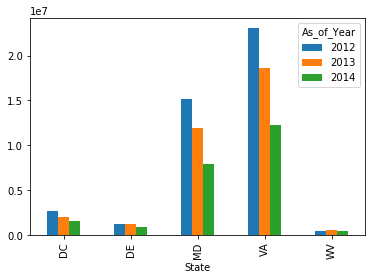

In [16]:
combined_data[['State','As_of_Year','Loan_Amount_000','FFIEC_Median_Family_Income']].groupby(
    ['State','As_of_Year'])['Loan_Amount_000'].sum().unstack(1).plot(kind='bar')

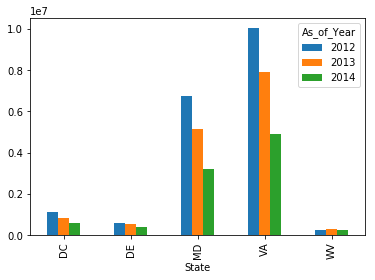

In [17]:
combined_data[['State','As_of_Year','Applicant_Income_000']].groupby(
    ['State','As_of_Year'])['Applicant_Income_000'].sum().unstack(1).plot(kind='bar')

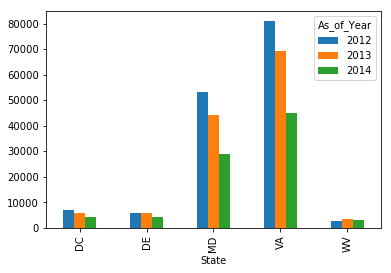

In [18]:
combined_data[['State','As_of_Year','Applicant_Income_000']].groupby(
    ['State','As_of_Year'])['Applicant_Income_000'].count().unstack(1).plot(kind='bar')